# Q1-COMPANY DATA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
#from sklearn.cross_validation import KFold
from sklearn.model_selection import KFold

In [2]:
company=pd.read_csv('Company_Data.csv')
company
company1=company.iloc[:,0:7]
company1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc
0,9.50,138,73,11,276,120,Bad
1,11.22,111,48,16,260,83,Good
2,10.06,113,35,10,269,80,Medium
3,7.40,117,100,4,466,97,Medium
4,4.15,141,64,3,340,128,Bad
...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good
396,6.14,139,23,3,37,120,Medium
397,7.41,162,26,12,368,159,Medium
398,5.94,100,79,7,284,95,Bad


In [3]:
# change the non numeric to numeric
labelenocer=LabelEncoder()
(company1["ShelveLoc"])=labelenocer.fit_transform(company1['ShelveLoc'])

In [4]:
# normalization of the function 

def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return(x)

In [5]:
company1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc
0,9.50,138,73,11,276,120,0
1,11.22,111,48,16,260,83,1
2,10.06,113,35,10,269,80,2
3,7.40,117,100,4,466,97,2
4,4.15,141,64,3,340,128,0
...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1
396,6.14,139,23,3,37,120,2
397,7.41,162,26,12,368,159,2
398,5.94,100,79,7,284,95,0


In [6]:
from sklearn.model_selection import train_test_split
 

df_norm = norm_func(company1.iloc[:,0:6])
df_norm.tail(10)

,Sales,CompPrice,Income,Advertising,Population,Price
390,0.336202,0.316327,0.545455,0.310345,0.102204,0.520958
391,0.374923,0.775510,0.424242,0.000000,0.078156,0.598802
392,0.278427,0.530612,0.212121,0.448276,0.611222,0.634731
393,0.342348,0.326531,0.303030,0.344828,0.032064,0.574850
394,0.328826,0.540816,0.373737,0.655172,0.713427,0.688623
395,0.772588,0.622449,0.878788,0.586207,0.386774,0.622754
396,0.377382,0.632653,0.020202,0.103448,0.054108,0.574850
397,0.455439,0.867347,0.050505,0.413793,0.717435,0.808383
398,0.365089,0.234694,0.585859,0.241379,0.549098,0.425150
399,0.596804,0.581633,0.161616,0.000000,0.034068,0.574850


In [7]:
company2 = company1.iloc[:,6]
company2

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 400, dtype: int32

In [8]:
company3=pd.concat([df_norm,company2],axis=1)
company3

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc
0,0.583897,0.622449,0.525253,0.379310,0.533066,0.574850,0
1,0.689613,0.346939,0.272727,0.551724,0.501002,0.353293,1
2,0.618316,0.367347,0.141414,0.344828,0.519038,0.335329,2
3,0.454825,0.408163,0.797980,0.137931,0.913828,0.437126,2
4,0.255071,0.653061,0.434343,0.103448,0.661323,0.622754,0
...,...,...,...,...,...,...,...
395,0.772588,0.622449,0.878788,0.586207,0.386774,0.622754,1
396,0.377382,0.632653,0.020202,0.103448,0.054108,0.574850,2
397,0.455439,0.867347,0.050505,0.413793,0.717435,0.808383,2
398,0.365089,0.234694,0.585859,0.241379,0.549098,0.425150,0


In [10]:
x1=company3.iloc[:,0:6]
y1=company3.iloc[:,6]

In [11]:
x1

,Sales,CompPrice,Income,Advertising,Population,Price
0,0.583897,0.622449,0.525253,0.379310,0.533066,0.574850
1,0.689613,0.346939,0.272727,0.551724,0.501002,0.353293
2,0.618316,0.367347,0.141414,0.344828,0.519038,0.335329
3,0.454825,0.408163,0.797980,0.137931,0.913828,0.437126
4,0.255071,0.653061,0.434343,0.103448,0.661323,0.622754
...,...,...,...,...,...,...
395,0.772588,0.622449,0.878788,0.586207,0.386774,0.622754
396,0.377382,0.632653,0.020202,0.103448,0.054108,0.574850
397,0.455439,0.867347,0.050505,0.413793,0.717435,0.808383
398,0.365089,0.234694,0.585859,0.241379,0.549098,0.425150


In [12]:
y1

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 400, dtype: int32

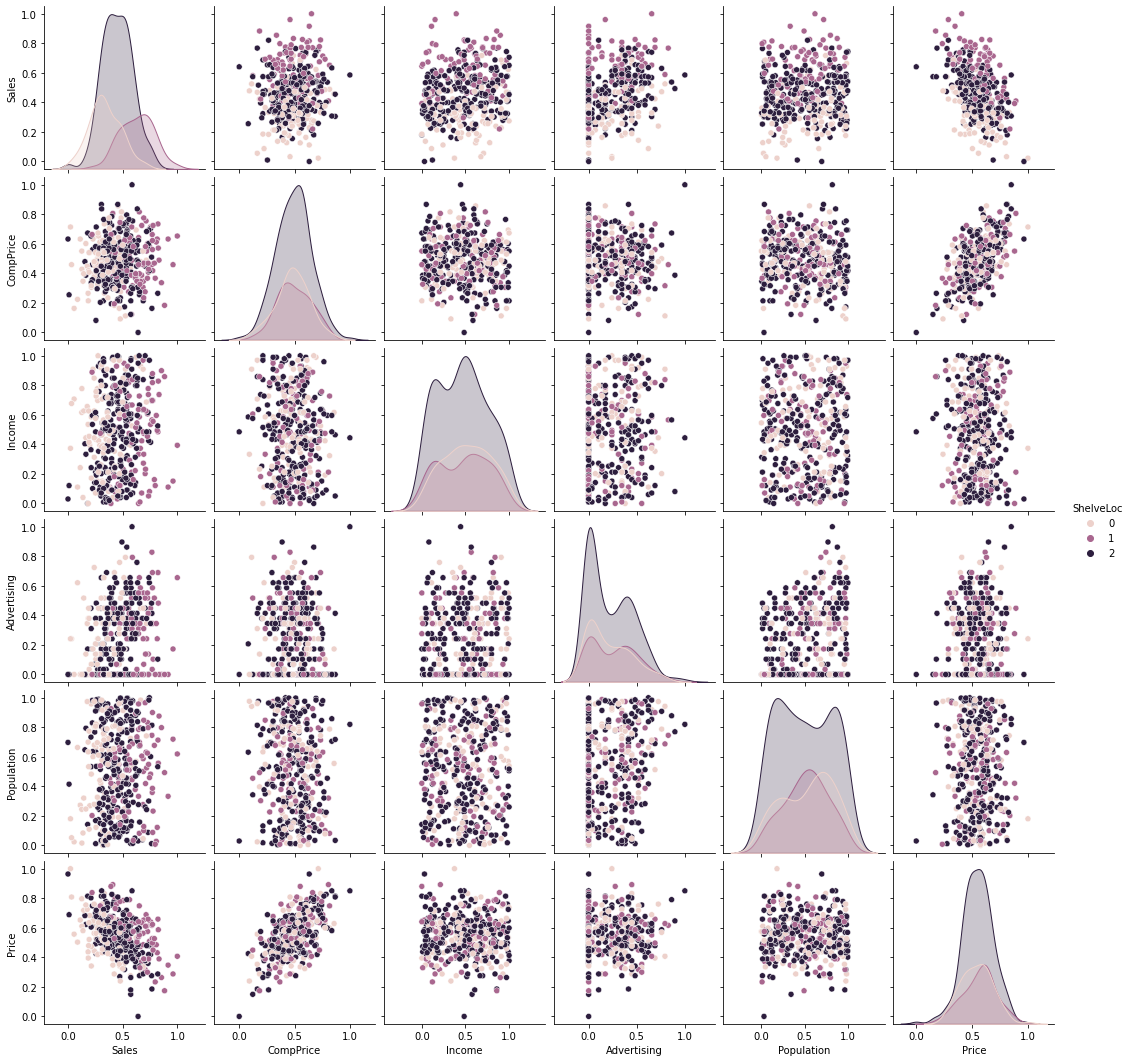

In [13]:
# let plot pair plot to visualized the atrributes all at once
import seaborn as sns
sns.pairplot(data=company3 , hue= "ShelveLoc")

In [14]:
# splitting data into train & test
xtrain ,xtest ,ytrain , ytest = train_test_split(x1,y1, test_size=0.2,random_state=2)

In [15]:
model32=DecisionTreeClassifier(criterion = "entropy",max_depth=3)
model32.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [16]:
pred2=model32.predict(xtest)

In [17]:
np.mean(pred2==ytest)*100

67.5

In [18]:
print(classification_report(pred2,ytest))

              precision    recall  f1-score   support

           0       0.28      0.71      0.40         7
           1       0.55      0.79      0.65        14
           2       0.90      0.64      0.75        59

    accuracy                           0.68        80
   macro avg       0.58      0.71      0.60        80
weighted avg       0.79      0.68      0.70        80



In [19]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [20]:
KFold = KFold(n_splits=10)
model2 = RandomForestClassifier(n_estimators=100,max_features=3)
results = cross_val_score(model2,x1,y1,cv=KFold)
print(results.mean()*100)

63.74999999999999


# Q2- FRAUD DETECTION

In [21]:
# Q2 fraud detection 

In [22]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing


In [23]:
data = pd.read_csv("Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [24]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [25]:
data.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [26]:
# adding the column 
data['Taxinc']= pd.cut(data['Taxable.Income'], bins = [10000,30000,99620], labels = ["Risky", "Good"])
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxinc
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [27]:
#converting the data 
data1= pd.get_dummies(data)
data1

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Taxinc_Risky,Taxinc_Good
0,68833,50047,10,1,0,0,0,1,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1,0,1
2,36925,160205,30,1,0,0,1,0,0,1,0,1
3,50190,193264,15,0,1,0,0,1,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1,0,1
596,69967,55369,2,0,1,1,0,0,0,1,0,1
597,47334,154058,0,1,0,1,0,0,0,1,0,1
598,98592,180083,17,0,1,0,1,0,1,0,0,1


In [28]:
data1.drop(data1.columns[[3,5,8,10]],axis=1,inplace=True)
data1

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Taxinc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1


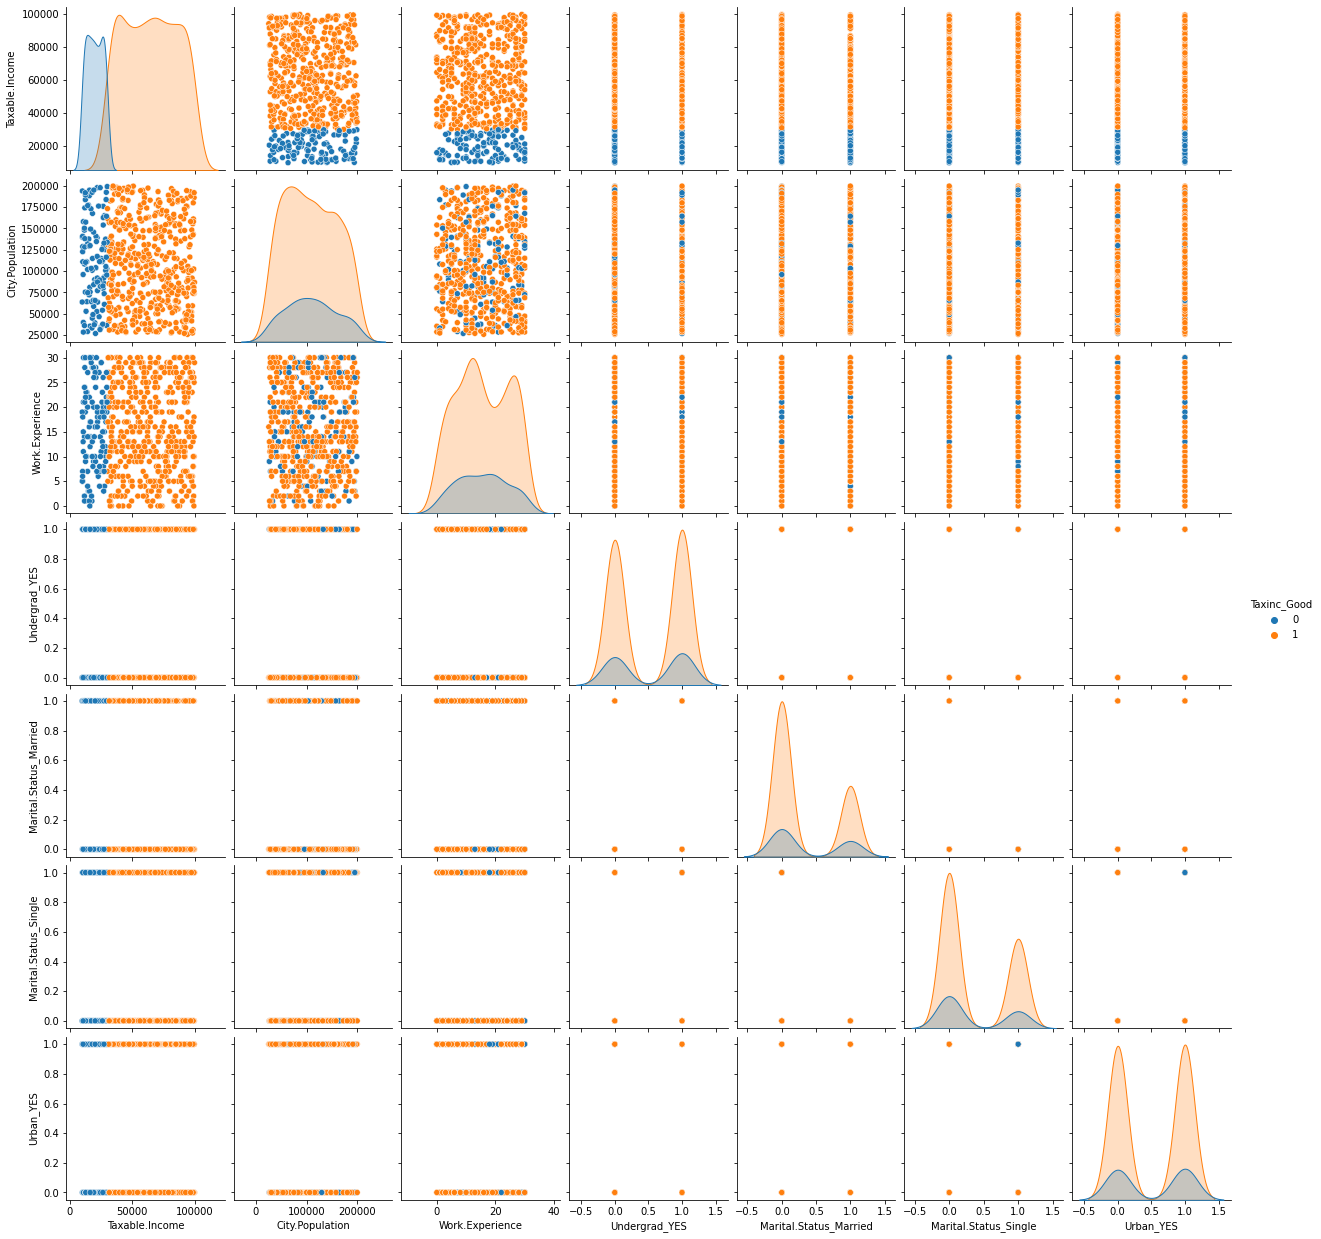

In [29]:
# drw pairplot to vizualized the data 
import seaborn as sns
sns.pairplot(data=data1, hue = 'Taxinc_Good')

In [30]:
# normalized the function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [31]:
# normalized data frame (considering the numerical part of data)
data_norm = norm_func(data1.iloc[:,1:])
data_norm.tail(10)


,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Taxinc_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,1.0
591,0.615406,0.600000,1.0,0.0,1.0,1.0,0.0
592,0.283703,0.533333,1.0,0.0,1.0,0.0,1.0
593,0.610256,0.333333,0.0,0.0,0.0,1.0,1.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0,1.0
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


In [32]:
X1 = data_norm.drop(['Taxinc_Good'],axis=1)
y1 = data_norm['Taxinc_Good']


In [33]:
from sklearn.model_selection import MinMaxScaler

ImportError: cannot import name 'MinMaxScaler' from 'sklearn.model_selection' (C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\__init__.py)

In [34]:
x1

,Sales,CompPrice,Income,Advertising,Population,Price
0,0.583897,0.622449,0.525253,0.379310,0.533066,0.574850
1,0.689613,0.346939,0.272727,0.551724,0.501002,0.353293
2,0.618316,0.367347,0.141414,0.344828,0.519038,0.335329
3,0.454825,0.408163,0.797980,0.137931,0.913828,0.437126
4,0.255071,0.653061,0.434343,0.103448,0.661323,0.622754
...,...,...,...,...,...,...
395,0.772588,0.622449,0.878788,0.586207,0.386774,0.622754
396,0.377382,0.632653,0.020202,0.103448,0.054108,0.574850
397,0.455439,0.867347,0.050505,0.413793,0.717435,0.808383
398,0.365089,0.234694,0.585859,0.241379,0.549098,0.425150


In [35]:
y1

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
595    1.0
596    1.0
597    1.0
598    1.0
599    1.0
Name: Taxinc_Good, Length: 600, dtype: float64

In [36]:
# splitting the data into train test
Xtrain,Xtest, ytrain ,  ytest = train_test_split(X1 ,y1, test_size=0.2,random_state=0)

In [37]:
model = DecisionTreeClassifier(criterion = "entropy",max_depth=3)
model.fit(Xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [38]:
pred = model.predict(Xtest)

In [39]:
pd.Series(pred).value_counts

<bound method IndexOpsMixin.value_counts of 0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
115    1.0
116    1.0
117    1.0
118    1.0
119    1.0
Length: 120, dtype: float64>

In [40]:
np.mean(pred==ytest)*100

78.33333333333333

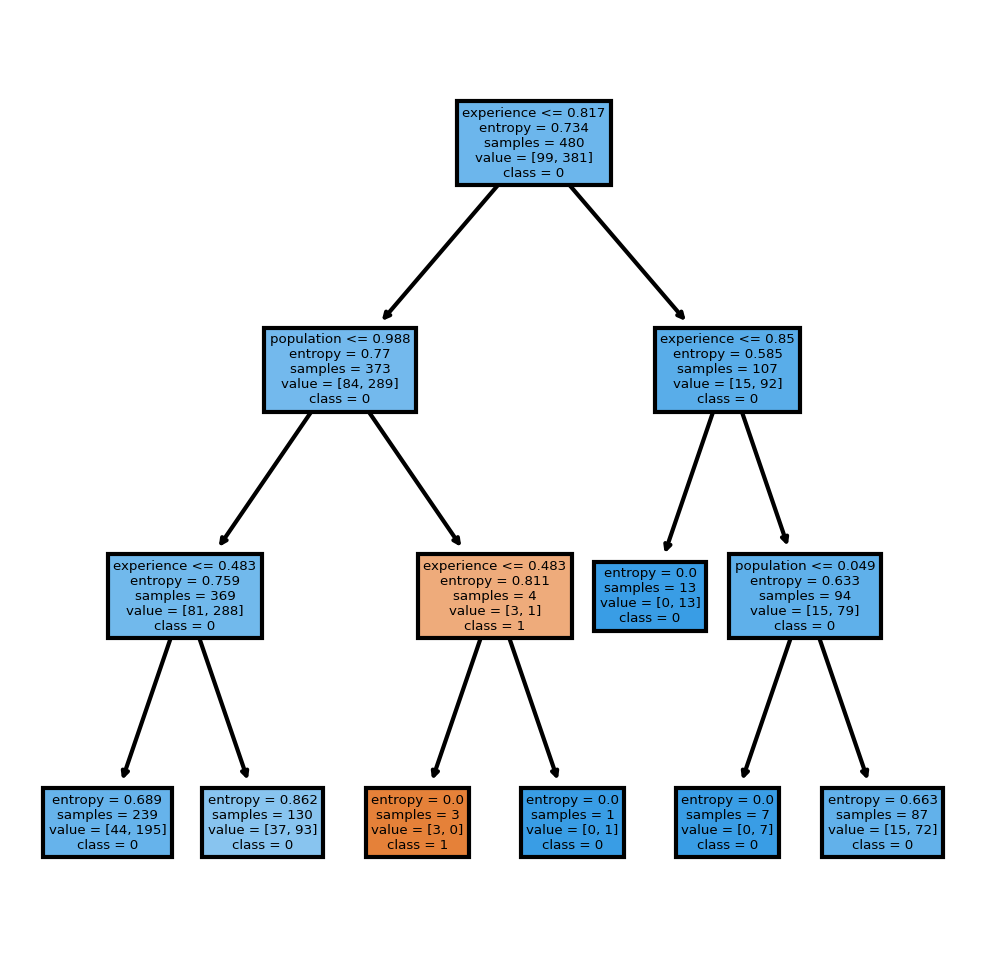

In [41]:
fn = ['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn =['1','0']
fig,axes = plt.subplots(nrows =1,ncols = 1,figsize =(4,4),dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [42]:
#from sklearn.model_selection import KFold
#from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [43]:
#number of column of x=9 so squrt is 3 ,then ax feature is 3
KFold = KFold(n_splits=10)
model = RandomForestRegressor(n_estimators=100,max_features=3)
results = cross_val_score(model,X1,y1,cv=KFold)
print(results.mean)
#t_pred = logreg.predict(X_test)

<built-in method mean of numpy.ndarray object at 0x000001D8E886D950>


In [44]:
# predict on test data 
#preds =model.predict(X_test)
#d.Series(preds).value_counts()